In [113]:
# Import pandas(for making data tables)
import pandas as pd
import numpy as np

# Graphing modules
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from matplotlib import mlab as ml
import seaborn as sns

# Makes plots in notebook
%matplotlib inline

In [114]:
# Create a Dataframe and drop extra column
df = pd.read_csv('./data/features_seattle_911_no_dup.csv', low_memory=False)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.Datetime = pd.to_datetime(df.Datetime)

In [115]:
# Examine head of the DataFrame
df.head()

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number,dt_crop,date,time,...,trav_holiday,dang_holiday,weekday,night,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,6900 37th Av S,Medic Response,2011-11-09 23:33:00,47.540683,-122.286131,"(47.540683, -122.286131)",F110104166,11/09/2011 11:33:00 PM,2011-11-09,23:33:00,...,0,0,Wednesday,1,0,0,0,0,0,1
1,N 50th St / Stone Way N,Aid Response,2011-11-09 23:32:00,47.665034,-122.340207,"(47.665034, -122.340207)",F110104164,11/09/2011 11:32:00 PM,2011-11-09,23:32:00,...,0,0,Wednesday,1,0,0,0,0,0,1
2,E John St / E Olive Way,Aid Response,2011-11-09 23:32:00,47.619575,-122.324257,"(47.619575, -122.324257)",F110104165,11/09/2011 11:32:00 PM,2011-11-09,23:32:00,...,0,0,Wednesday,1,0,0,0,0,0,1
3,611 12th Av S,Aid Response,2011-11-09 23:29:00,47.597406,-122.317228,"(47.597406, -122.317228)",F110104162,11/09/2011 11:29:00 PM,2011-11-09,23:29:00,...,0,0,Wednesday,1,0,0,0,0,0,1
4,4545 42nd Av Sw,Automatic Medical Alarm,2011-11-09 23:25:00,47.562472,-122.385455,"(47.562472, -122.385455)",F110104161,11/09/2011 11:25:00 PM,2011-11-09,23:25:00,...,0,0,Wednesday,1,0,0,0,0,0,1


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551095 entries, 0 to 551094
Data columns (total 25 columns):
Address            551086 non-null object
Type               551095 non-null object
Datetime           551095 non-null datetime64[ns]
Latitude           551095 non-null float64
Longitude          551095 non-null float64
Report Location    520631 non-null object
Incident Number    522111 non-null object
dt_crop            551095 non-null object
date               551095 non-null object
time               551095 non-null object
date2              551095 non-null object
time2              551095 non-null object
mariners_home      551095 non-null int64
seahawks_home      551095 non-null int64
sounders_home      551095 non-null int64
trav_holiday       551095 non-null int64
dang_holiday       551095 non-null int64
weekday            551095 non-null object
night              551095 non-null int64
Monday             551095 non-null int64
Saturday           551095 non-null int64
Sunda

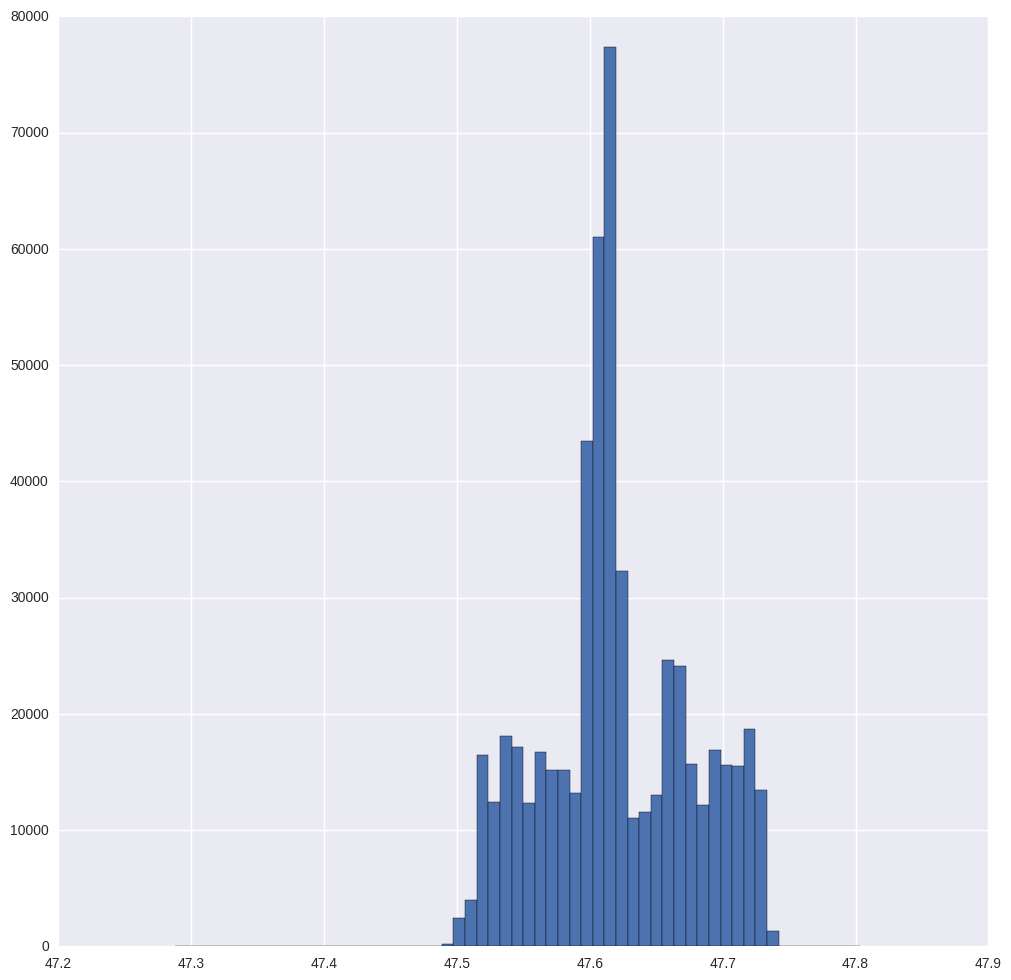

In [117]:
plt.figure(figsize=(12,12))
df.Latitude.hist(bins=60);

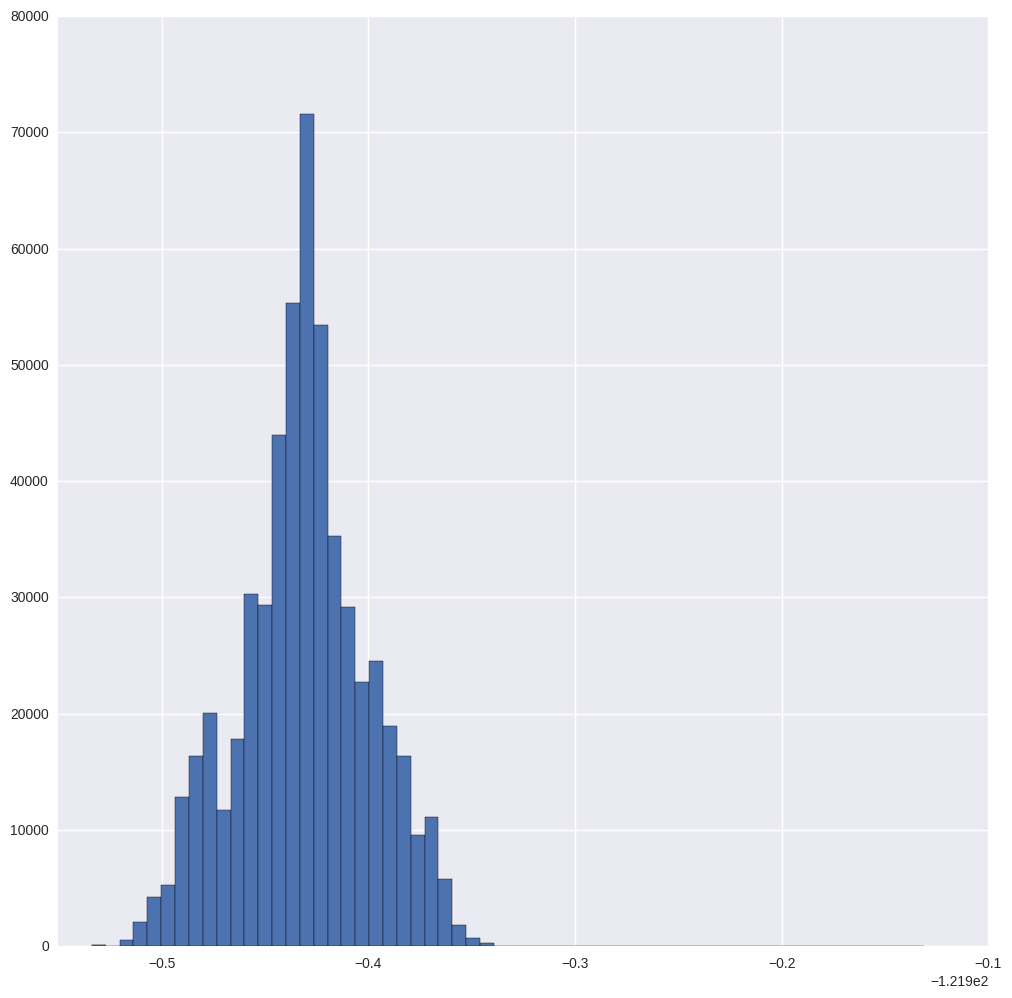

In [118]:
plt.figure(figsize=(12,12))
df.Longitude.hist(bins=60);

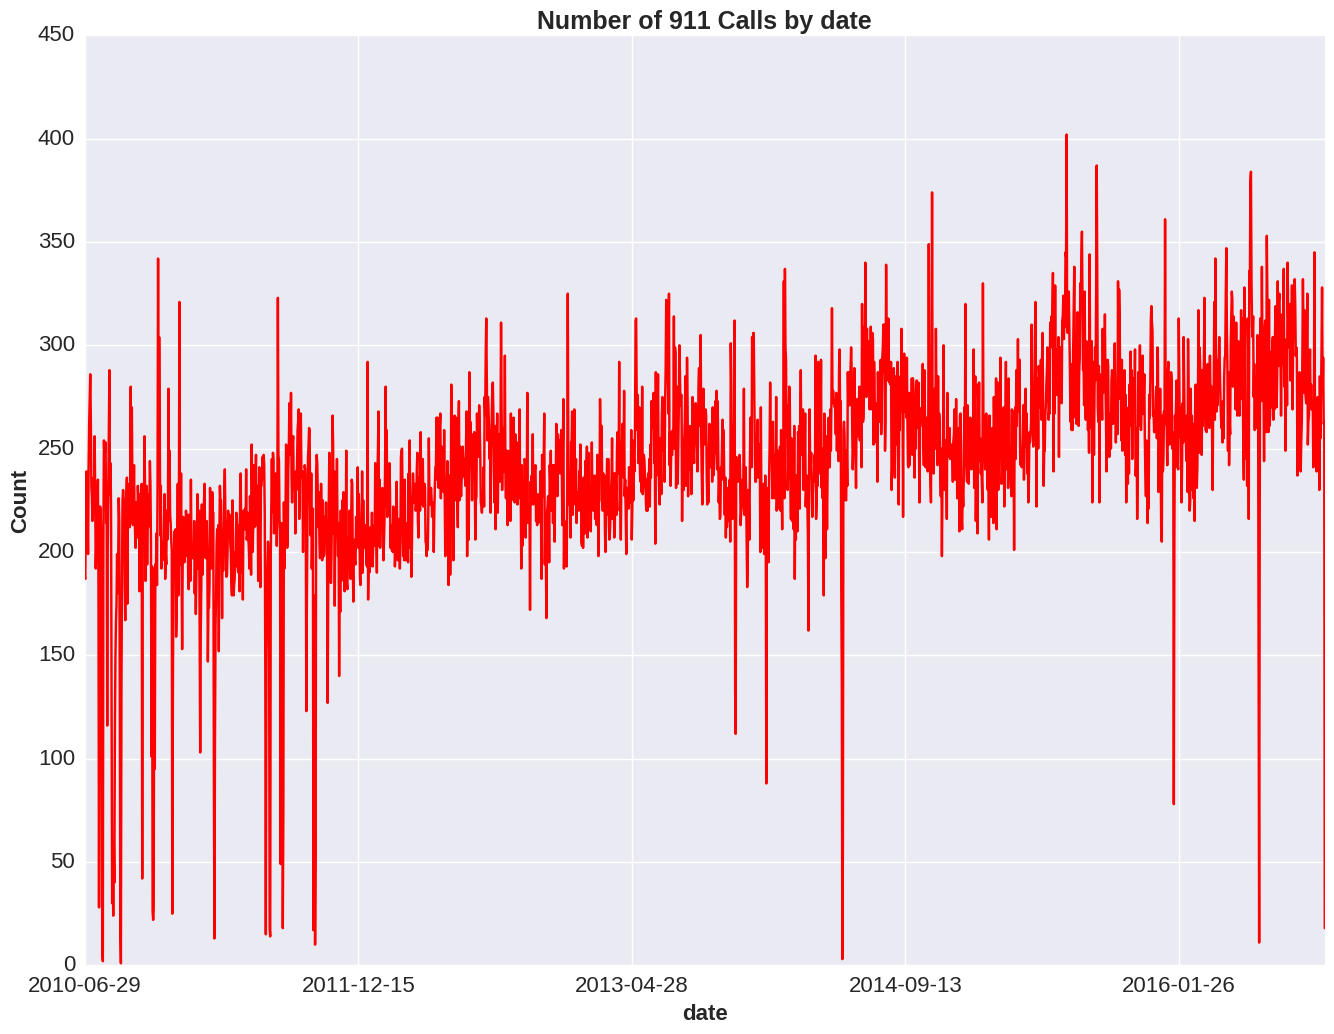

In [119]:
# 911 call counts by day
plt.figure(figsize=(16,12))
plt.xticks(fontsize=16)
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.yticks(fontsize=16)
plt.ylabel('Count', fontsize=16, fontweight='bold')
plt.title('Number of 911 Calls by date', fontsize=18, fontweight='bold')
df.groupby(by='date').Datetime.count().plot(color='r');

In [120]:
# Days in dataset
len(df.groupby(by='date').Datetime.count())

2268

(0, 200)

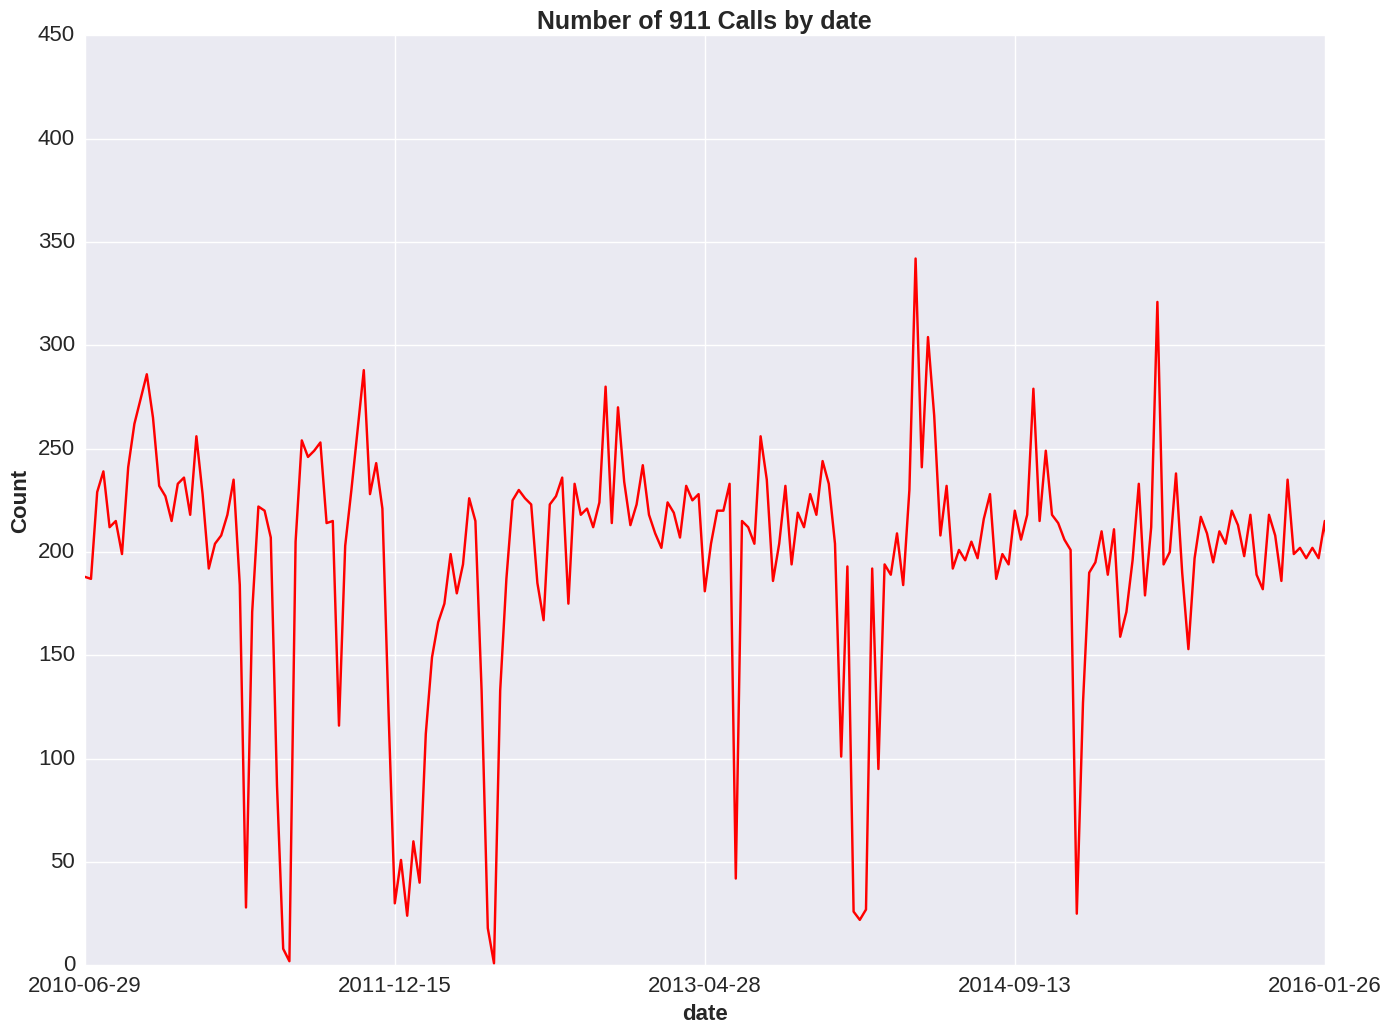

In [121]:
# 
plt.figure(figsize=(16,12))
plt.xticks(fontsize=16)
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.yticks(fontsize=16)
plt.ylabel('Count', fontsize=16, fontweight='bold')
plt.title('Number of 911 Calls by date', fontsize=18, fontweight='bold')
df.groupby(by='date').Datetime.count().plot(color='r');
plt.xlim(0, 200)

(1200, 2200)

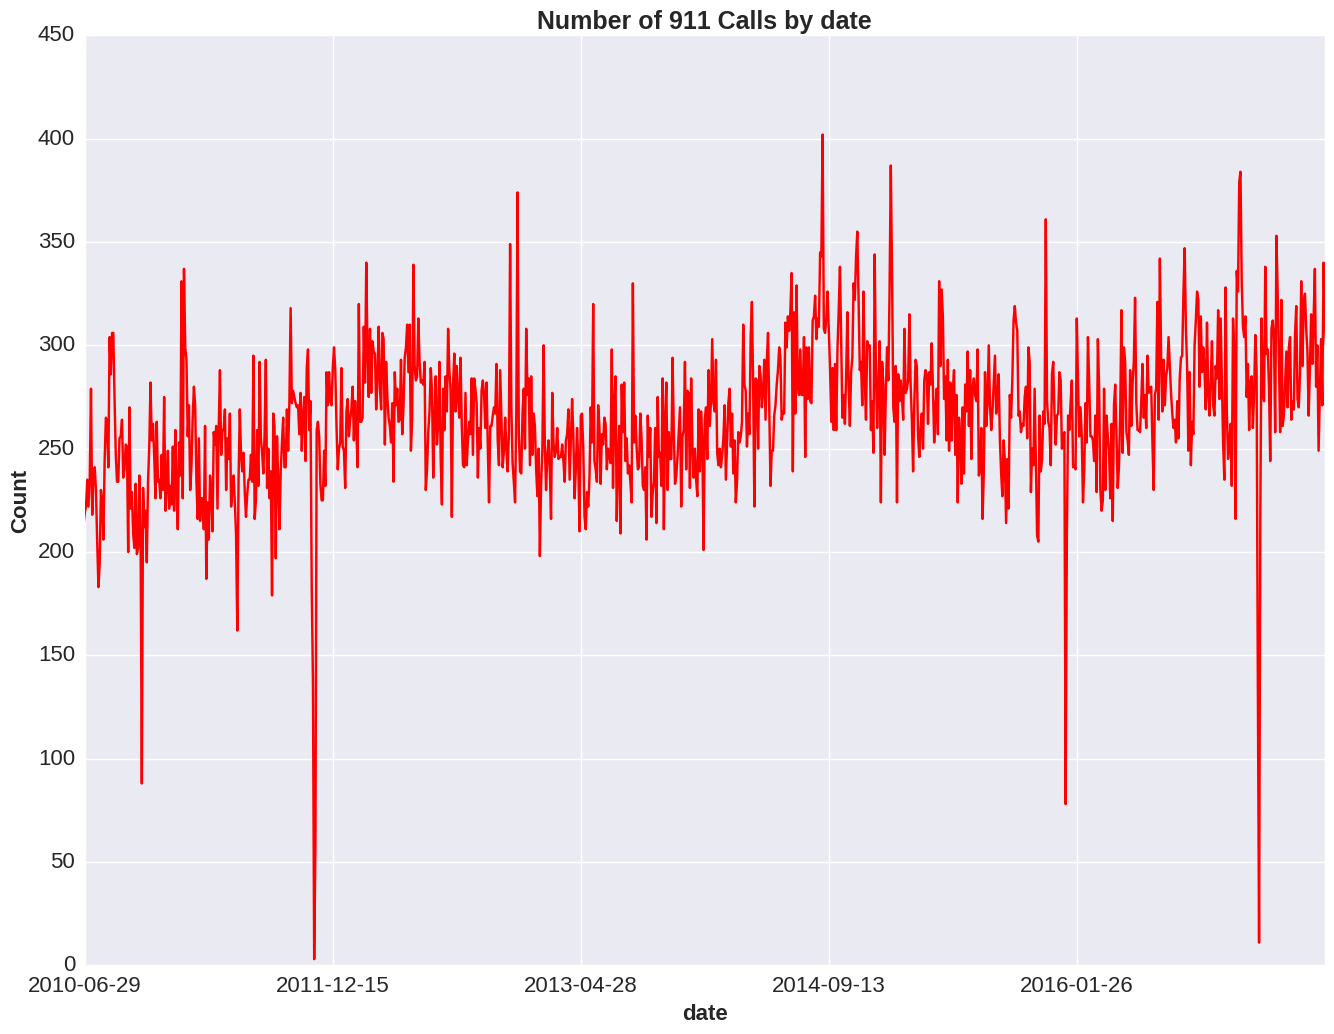

In [122]:
plt.figure(figsize=(16,12))
plt.xticks(fontsize=16)
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.yticks(fontsize=16)
plt.ylabel('Count', fontsize=16, fontweight='bold')
plt.title('Number of 911 Calls by date', fontsize=18, fontweight='bold')
df.groupby(by='date').Datetime.count().plot(color='r');
plt.xlim(1200, 2200)

In [123]:
df.Datetime.min()

Timestamp('2010-06-29 01:00:00')

In [124]:
df.Datetime.max()

Timestamp('2016-10-19 00:59:00')

In [125]:
# Days with extremely low values. Data capture problem?
df.groupby(by='date').Datetime.count().sort_values().head(10)

date
2010-09-04     1
2010-08-01     2
2014-05-21     3
2010-07-31     8
2011-09-21    10
2016-06-21    11
2011-03-06    13
2011-06-21    14
2011-06-09    15
2011-09-18    17
Name: Datetime, dtype: int64

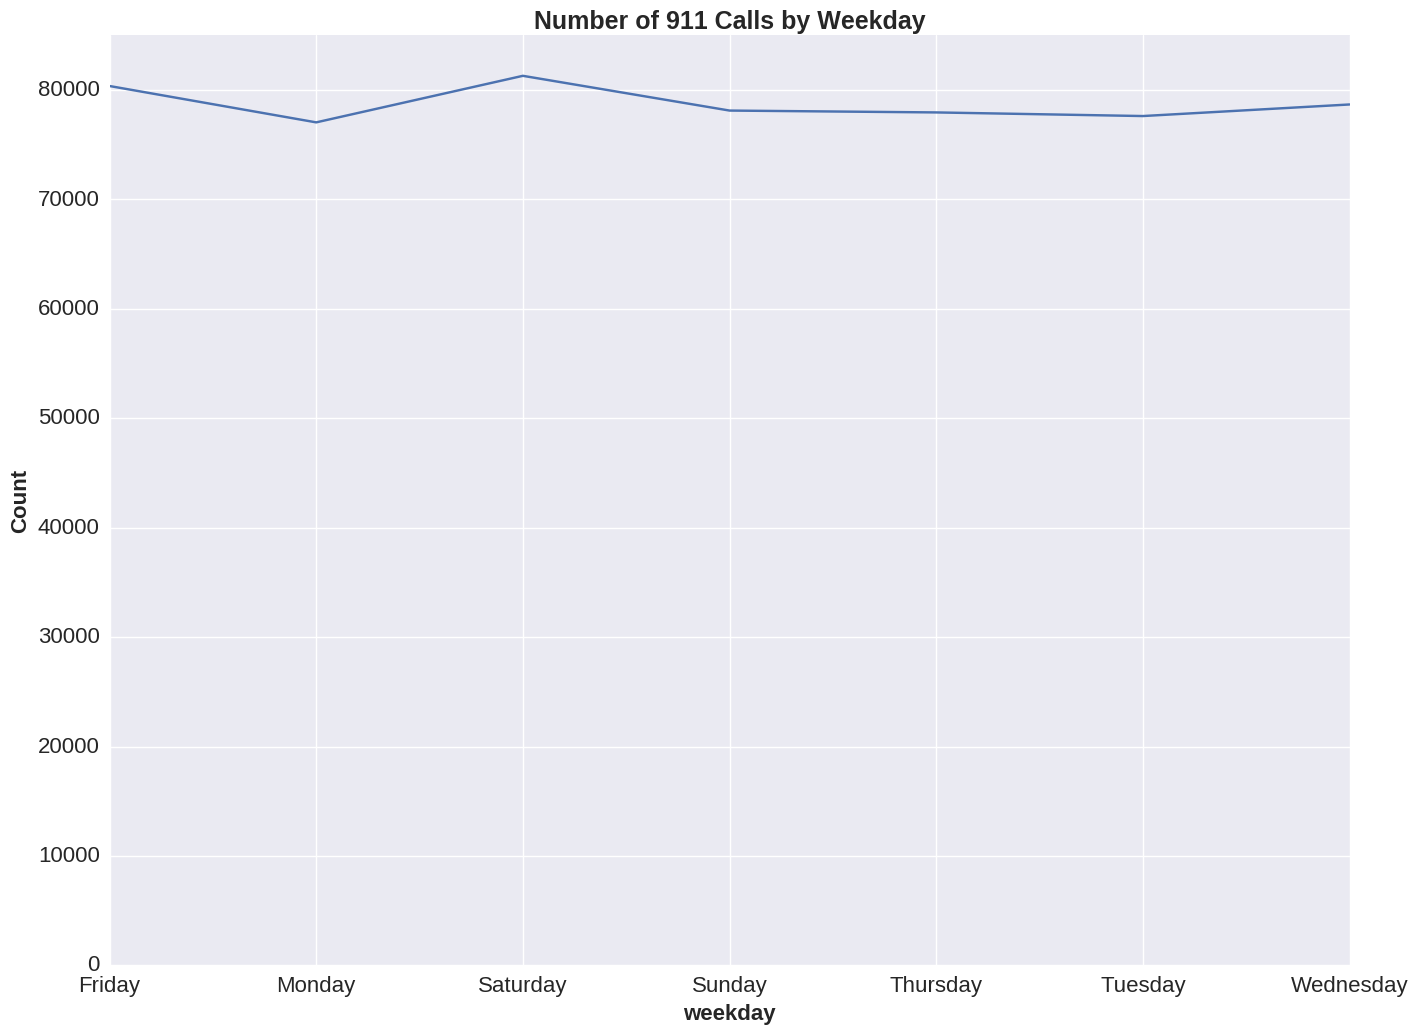

In [126]:
# Friday and Saturday are slightly more active

plt.figure(figsize=(16,12))
plt.xticks(fontsize=16)
plt.xlabel('Weekday', fontsize=16, fontweight='bold')
plt.yticks(fontsize=16)
plt.ylabel('Count', fontsize=16, fontweight='bold')
plt.ylim(0,85000)
plt.title('Number of 911 Calls by Weekday', fontsize=18, fontweight='bold')
df.groupby(by='weekday').Latitude.count().plot();

In [127]:
# Nighttime is more active
df[df.night == 1].groupby(by='date').Latitude.count().mean()

139.93738977072312

In [128]:
df[df.night == 0].groupby(by='date').Latitude.count().mean()

103.96663701067615

In [129]:
# Total dates
df.date.nunique()

2268

In [130]:
# Average daily 911 medical calls on game days
df.groupby(by='date').Latitude.count().mean()

242.98721340388008

In [131]:
counts = df.groupby(by='date').Latitude.count()
mean = counts.mean()
std = counts.std()

def find_dev(count):
    diff = count - mean
    devs = diff / std
    return 'count: {}   diff: {}   devs: {}'.format(count, diff, devs)    

In [132]:
# Travel holiday calls
hol_calls = df[df.trav_holiday == 1].groupby(by='date').Latitude.count().mean()
find_dev(hol_calls)

'count: 221.611111111   diff: -21.3761022928   devs: -0.476035277048'

In [133]:
not_hol_calls = df[df.trav_holiday == 0].groupby(by='date').Latitude.count().mean()
find_dev(not_hol_calls)

'count: 243.331989247   diff: 0.344775843432   devs: 0.00767798833949'

In [134]:
# Danger holiday calls
dang_hol = df[df.dang_holiday == 1].groupby(by='date').Latitude.count().mean()
find_dev(dang_hol)

'count: 277.615384615   diff: 34.6281712115   devs: 0.77115232939'

In [136]:
df[df.weekday == 'Monday'].groupby(by='date').Latitude.count().mean()

240.01557632398755

In [138]:
# Days split into two dates
mon = df[df.weekday == 'Monday'].groupby(by='date').Latitude.count().mean()
tue = df[df.weekday == 'Tuesday'].groupby(by='date').Latitude.count().mean()
wed = df[df.weekday == 'Wednesday'].groupby(by='date').Latitude.count().mean()
thu = df[df.weekday == 'Thursday'].groupby(by='date').Latitude.count().mean()
fri = df[df.weekday == 'Friday'].groupby(by='date').Latitude.count().mean()
sat = df[df.weekday == 'Saturday'].groupby(by='date').Latitude.count().mean()
sun = df[df.weekday == 'Sunday'].groupby(by='date').Latitude.count().mean()

for day in [mon, tue, wed, thu, fri, sat, sun]:
    print find_dev(day)

count: 240.015576324   diff: -2.97163707989   devs: -0.0661768951719
count: 238.84   diff: -4.14721340388   devs: -0.0923564013053
count: 240.614678899   diff: -2.3725345048   devs: -0.0528351756943
count: 239.122699387   diff: -3.86451401738   devs: -0.0860608251085
count: 248.049382716   diff: 5.06216931217   devs: 0.112732019055
count: 251.702786378   diff: 8.71557297383   devs: 0.194091520447
count: 242.621118012   diff: -0.366095391458   devs: -0.00815276418085


In [140]:
seahawks = df[df.seahawks_home == 1].groupby(by='date').Latitude.count().mean()
mariners = df[df.mariners_home == 1].groupby(by='date').Latitude.count().mean()
sounders = df[df.sounders_home == 1].groupby(by='date').Latitude.count().mean()

for team in [seahawks, mariners, sounders]:
    print find_dev(team)

count: 236.115384615   diff: -6.8718287885   devs: -0.153032244904
count: 249.25483871   diff: 6.2676253058   devs: 0.139576930725
count: 254.771428571   diff: 11.7842151675   devs: 0.262428671759


In [67]:
hol_lst2 = ['2010-01-01', '2010-07-04', '2011-01-01', '2011-07-04', 
            '2012-01-01', '2012-07-04', '2013-01-01', '2013-07-04', 
            '2014-01-01', '2014-07-04', '2015-01-01', '2015-07-04', 
            '2016-01-01', '2016-07-04']

In [144]:
def check_date(date):
    count = df[df.date == date].Latitude.count()
    return find_dev(count)

for hol in hol_lst2:
    try:
        info = check_date(hol)
        print hol, '\t', info
    except KeyError:
        print hol, '\t' 'not in dataset'

2010-01-01 	count: 0   diff: -242.987213404   devs: -5.41120564767
2010-07-04 	count: 215   diff: -27.9872134039   devs: -0.623261467598
2011-01-01 	count: 321   diff: 78.0127865961   devs: 1.73730636072
2011-07-04 	count: 218   diff: -24.9872134039   devs: -0.556452944155
2012-01-01 	count: 292   diff: 49.0127865961   devs: 1.0914906341
2012-07-04 	count: 206   diff: -36.9872134039   devs: -0.823687037927
2013-01-01 	count: 325   diff: 82.0127865961   devs: 1.82638439198
2013-07-04 	count: 267   diff: 24.0127865961   devs: 0.534752938746
2014-01-01 	count: 208   diff: -34.9872134039   devs: -0.779148022299
2014-07-04 	count: 275   diff: 32.0127865961   devs: 0.71290900126
2015-01-01 	count: 320   diff: 77.0127865961   devs: 1.7150368529
2015-07-04 	count: 343   diff: 100.012786596   devs: 2.22723553263
2016-01-01 	count: 361   diff: 118.012786596   devs: 2.62808667329
2016-07-04 	count: 258   diff: 15.0127865961   devs: 0.334327368417


In [11]:
# Restrict Latitude and Longitude ranges for tighter plots
df = df[((df['Latitude'] < 47.77) & (df['Latitude'] > 47.47))]
df = df[((df['Longitude'] < -122.25) & (df['Longitude'] > -122.55))]

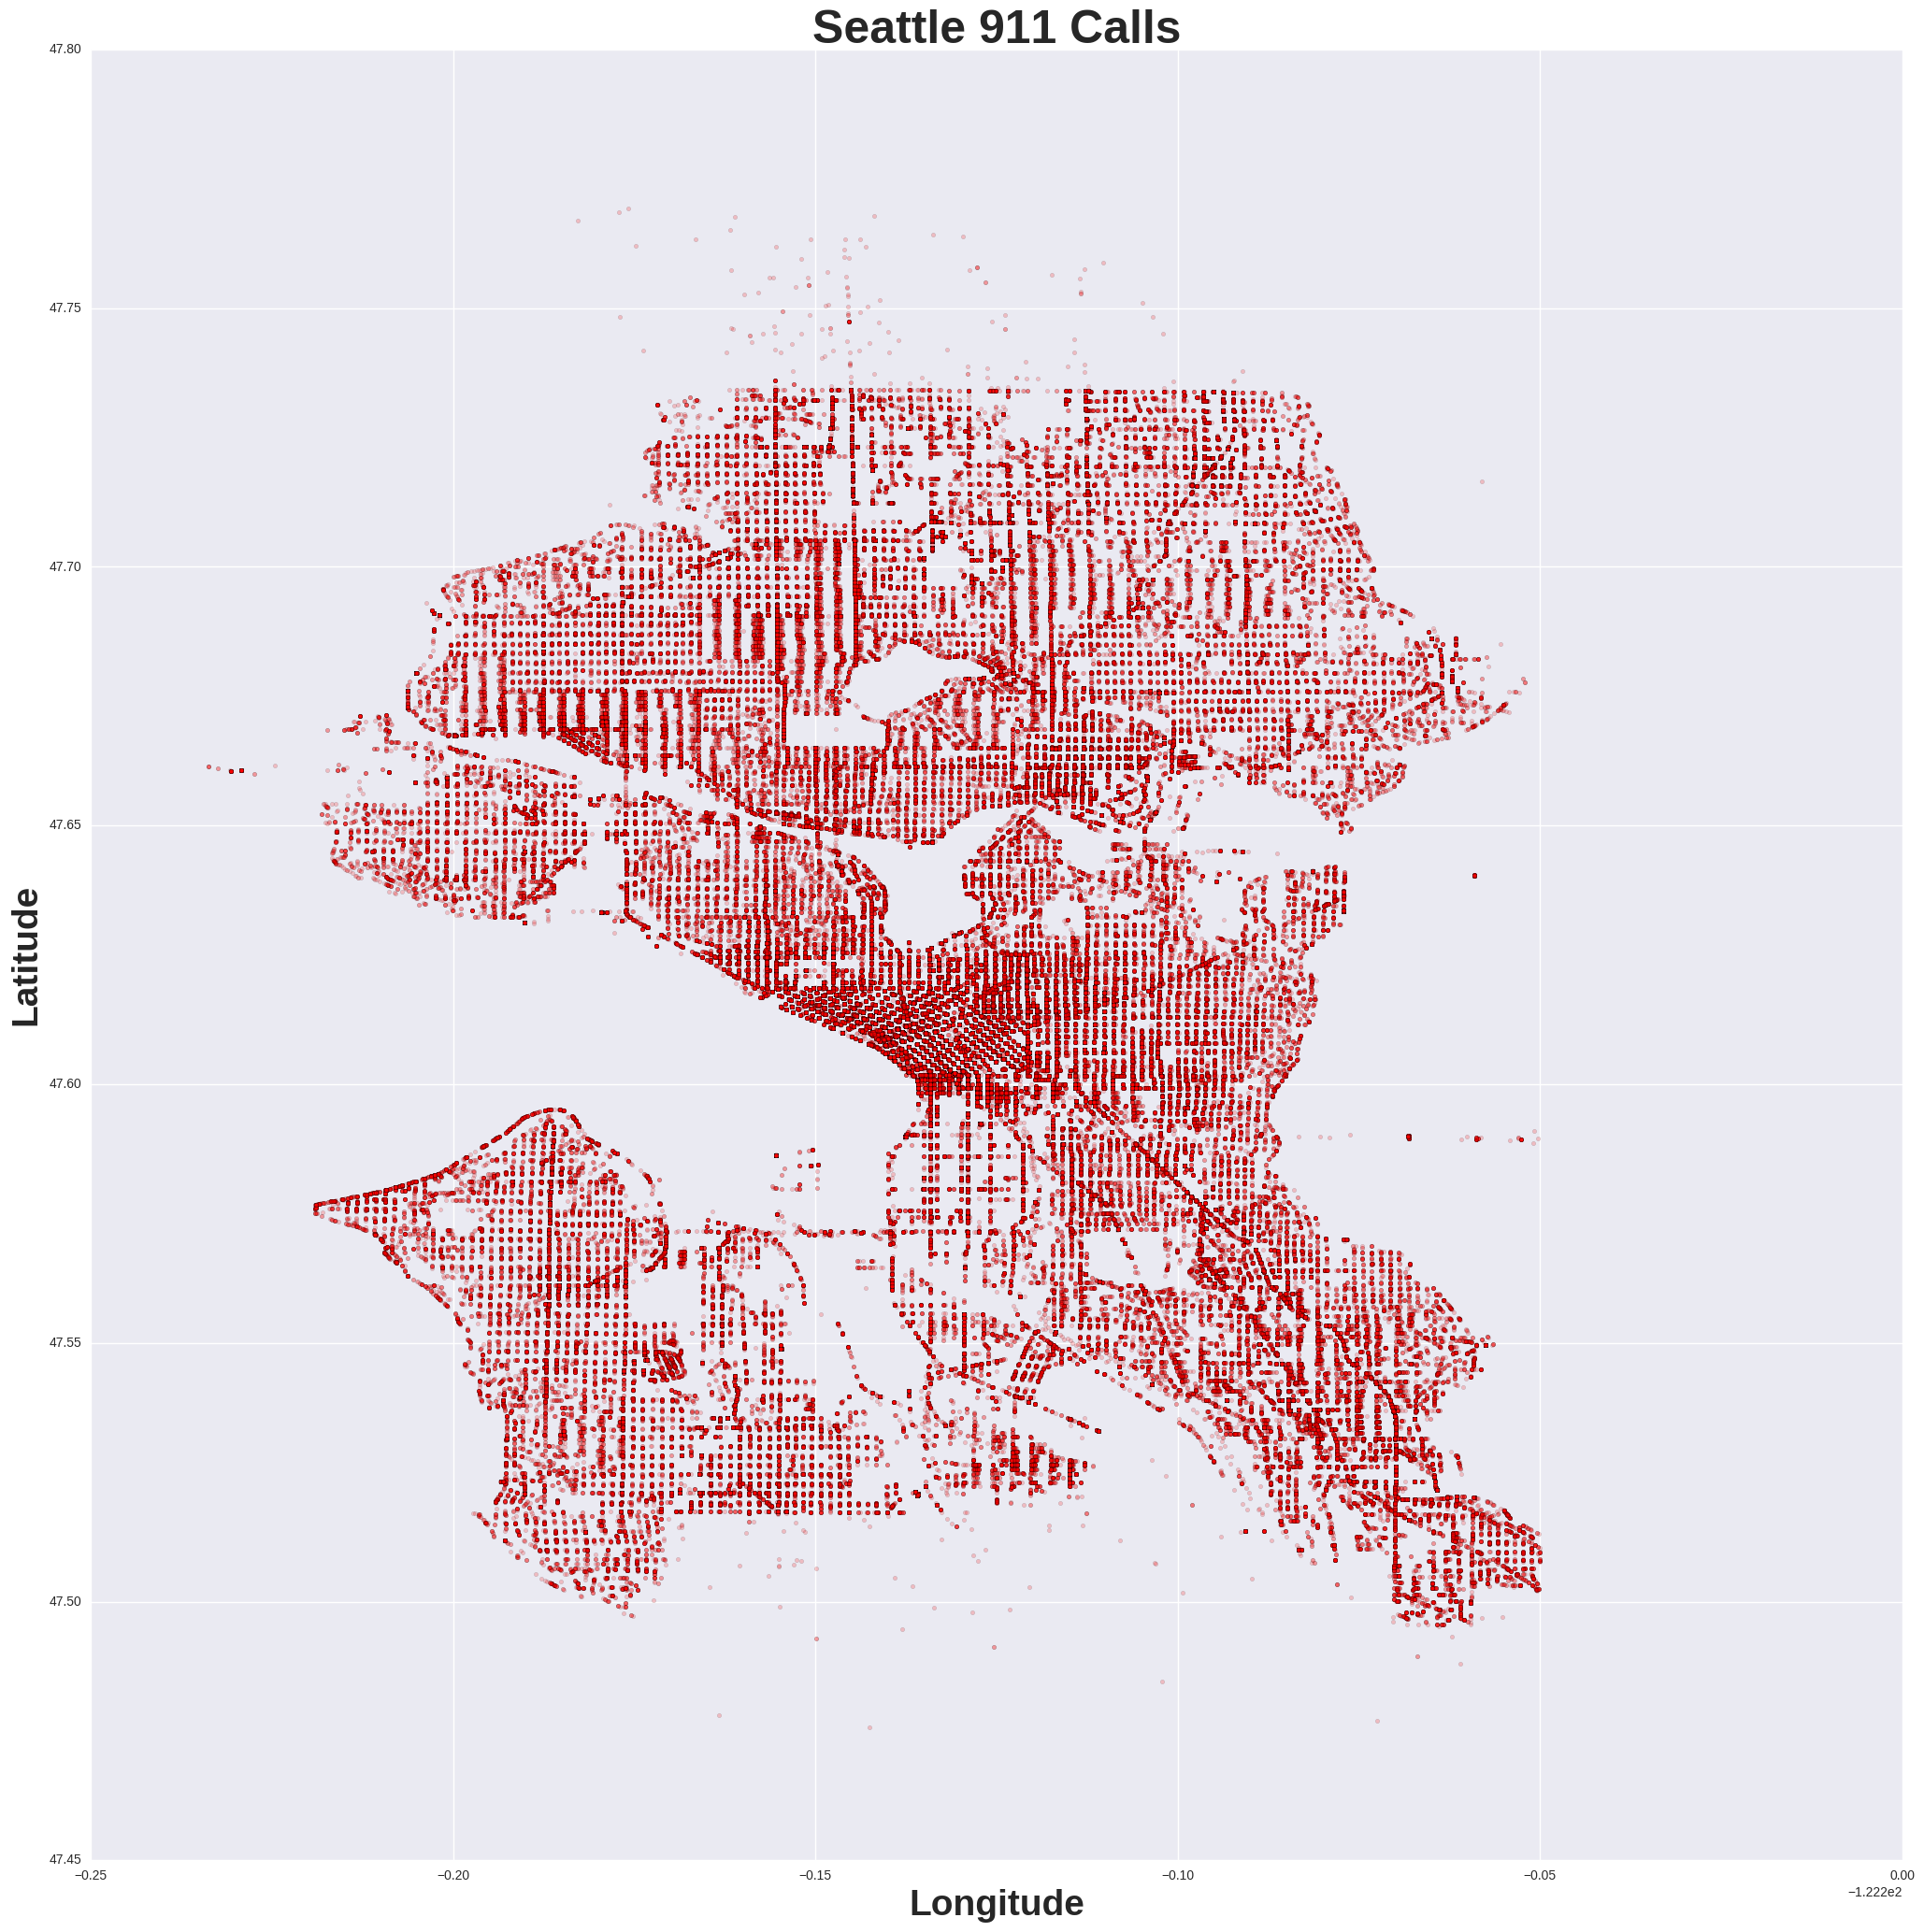

In [12]:
# Create and save a scatter plot (map) of 911 calls
df.plot(kind="scatter", x="Longitude", y="Latitude", color='r', s=10, alpha=0.2, figsize=(25,25))
plt.xlabel('Longitude', fontsize=28, fontweight='bold')
plt.ylabel('Latitude', fontsize=28, fontweight='bold')
plt.title('Seattle 911 Calls', fontsize=36, fontweight='bold')
plt.savefig('seattle_911.png')

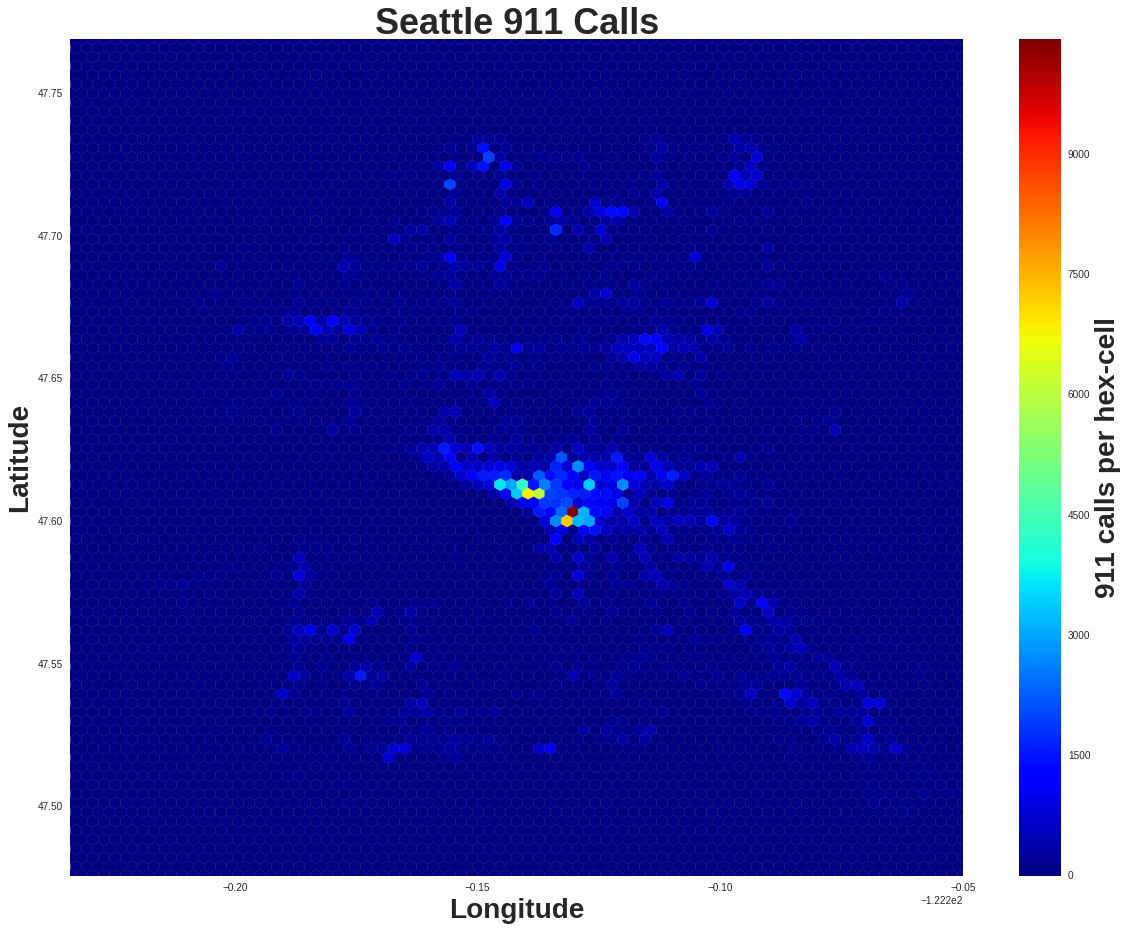

In [10]:
# Define axes for hexbin (3D histogram)
x = df.Longitude
y = df.Latitude

# If 'bins=None', hexagon colors correspond to counts
plt.figure(figsize=(20,15))
plt.hexbin(x, y, gridsize=80, cmap=plt.cm.jet, bins=None)
plt.axis([x.min(), x.max(), y.min(), y.max()])

# Label axes and create plot title
plt.xlabel('Longitude', fontsize=28, fontweight='bold')
plt.ylabel('Latitude', fontsize=28, fontweight='bold')
plt.title('Seattle 911 Calls', fontsize=36, fontweight='bold')

# Generate colormap scale and label, save plot
cb = plt.colorbar()
cb.set_label('911 calls per hex-cell', fontsize=28, fontweight='bold')
plt.savefig('seattle_911_hex.png')   

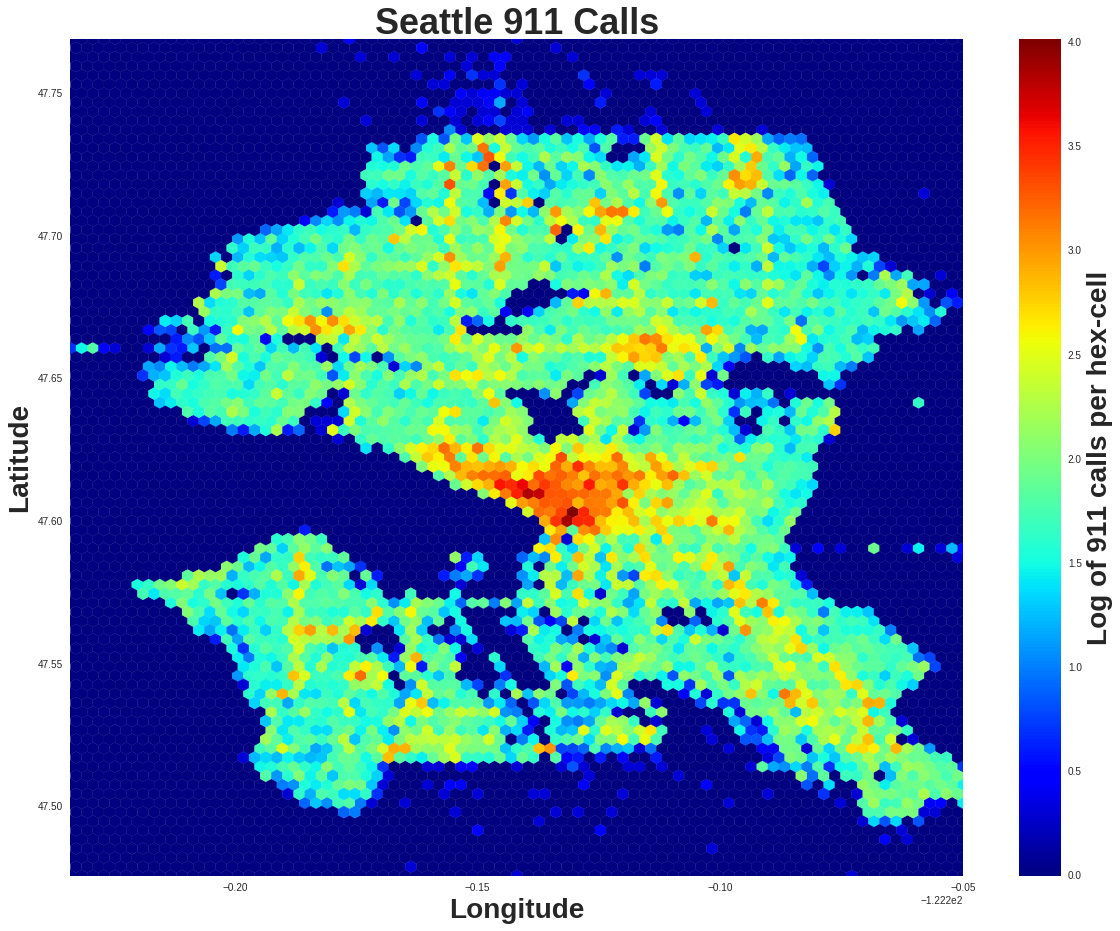

In [12]:
# Define axes for hexbin (3D histogram)
x = df.Longitude
y = df.Latitude

# Use log of counts for bins to reveal more structure  
plt.figure(figsize=(20,15))
plt.hexbin(x, y, gridsize=80, cmap=plt.cm.jet, bins='log')
plt.axis([x.min(), x.max(), y.min(), y.max()])

# Label axes and create plot title
plt.xlabel('Longitude', fontsize=28, fontweight='bold')
plt.ylabel('Latitude', fontsize=28, fontweight='bold')
plt.title('Seattle 911 Calls', fontsize=36, fontweight='bold')

# Generate colormap scale and label, save plot
cb = plt.colorbar()
cb.set_label('Log of 911 calls per hex-cell', fontsize=28, fontweight='bold')
plt.savefig('seattle_911_hexlog.png') 

In [14]:
# Investigate very 'hot' hex in downtown Seattle
df = df[((df['Latitude'] < 47.62) & (df['Latitude'] > 47.60))]
df = df[((df['Longitude'] < -122.33) & (df['Longitude'] > -122.34))]

In [16]:
# Majority of activity medical responses
df.groupby('Type').size()

Type
1RED 1 Unit                      297
3RED - 1 +1 + 1                   12
4RED - 2 + 1 + 1                 144
AFA4 - Auto Alarm 2 + 1 + 1      171
ANTIB - Antibiotic Delivery        1
Activated CO Detector             31
Aid Response                   41645
Aid Response Freeway              29
Aid Response Yellow              328
Aid Service                        6
Alarm Bell                       163
Assault w/Weap 7 per Rule        190
Assault w/Weapons 14               8
Assault w/Weapons, Aid             5
Assault w/Weapons- Aid            35
Auto Fire Alarm                 4075
Automatic Fire Alarm False       198
Automatic Fire Alarm Resd          2
Automatic Medical Alarm          190
Bark Fire                         39
Boat Taking Water Minr/Sho         1
Boat Under 50' Fire Shore          1
Boat Under 50' Fire Water          3
Boat Under 50' Unknown             1
Brush Fire                        18
Brush Fire Freeway                 4
Car Fire                         